## 시계열 데이터 탐색

### 시간조작하기

In [1]:
import pandas as pd

In [2]:
# 시간 유형 데이터 만들기
dates = ["2020-01-01", "2020-03-01","2021-09-01"]
dates

['2020-01-01', '2020-03-01', '2021-09-01']

In [3]:
# 날짜 타입으로 변환하기(형변환)
ts_dates = pd.to_datetime(dates)

In [4]:
ts_dates

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)

In [5]:
ts_dates[0]

Timestamp('2020-01-01 00:00:00')

In [6]:
type(ts_dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
# 날짜 형태를 기간 형태로 변환하기
pr_day = ts_dates.to_period(freq="D")

In [8]:
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')

In [9]:
# 년 월 단위로 추출하기
pr_month = ts_dates.to_period(freq="M")

In [10]:
pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')

In [11]:
pr_year = ts_dates.to_period(freq="Y")

In [12]:
pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]')

In [13]:
# 타임스탬프
# timeseries.csv 파일을 읽어 들이시고 조회해주세요 

file_path = "./data/timeseries.csv"
df = pd.read_csv(file_path)

df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [14]:
#데이터프레임 정보 확인하기 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


In [15]:
# new_Date 칼럼을 새로만들고
# Date 컬럼의 유형을 날짜 타입으로 변환해서
# new_Date 컬럼 생성시 넣어주세요 

df["new_Date"] = pd.to_datetime(df["Date"])

In [16]:
df["Date"]

0    2015-07-02
1    2016-06-29
2    2017-06-28
3    2018-06-27
4    2019-06-26
Name: Date, dtype: object

In [17]:
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [18]:
#new_Date컬럼의 0번째 값을 조회해주세요
# 0번째 값의 일반타입도 조회해주세요.
df["new_Date"][0]

Timestamp('2015-07-02 00:00:00')

In [19]:
#일반타입
df["new_Date"].iloc[0]

Timestamp('2015-07-02 00:00:00')

In [20]:
type(df["new_Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
# Date 컬럼 지우기
df.drop("Date",axis = 1, inplace = True) #컬럼은 1 행은 0 

In [22]:
df

,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2015-07-02
1,10700,10550,10900,9990,170253,2016-06-29
2,10400,10900,10950,10150,155769,2017-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2019-06-26


In [23]:
# 시계열 데이터로 만들기 위해서는
# 가급적 index를 날짜 타입의 값으로 변경해주는 게 좋다! 
df.set_index("new_Date", inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes


In [25]:
df

,Close,Start,High,Low,Volume
new_Date,,,,,
2015-07-02,10100,10850,10900,10000,137977
2016-06-29,10700,10550,10900,9990,170253
2017-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2019-06-26,10800,10900,11000,10700,63039


In [26]:
dates = ["2020-01-01", "2020-03-01","2021-09-01"]
dates

['2020-01-01', '2020-03-01', '2021-09-01']

In [27]:
ts__dates = pd.to_datetime(dates)

In [28]:
# period 함수 하용하여.. 날짜 추출하기

In [29]:
# 년도 추출하기
pr_year = ts_dates.to_period(freq="Y")
pr_year = ts_dates.to_period(freq="A")

In [30]:
pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]')

In [31]:
# 월 단위 추출
pr_month = ts_dates.to_period(freq="M")

In [32]:
pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')

In [33]:
# 일 단위 추출
pr_day = ts_dates.to_period(freq="D")

In [34]:
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')

In [35]:
# start : 기간의 시작값
# end: 기간의 끝값 
# periods: 생성할 기간의 갯수
# freq : 시간 간격 설정 
# tz: 시간 국가 지정 

#2020년 1우러 1일 시작으로
# 종료년도는 없고
# 6개 구간으로 나누기
# 시간 간격을 월 단위로 설정
# 시간대는 아시아/서울 기준으로... 
timestamp_df = pd.date_range(start = "2020-01-01",
                             end = None,
                             periods = 6,
                             freq = "Y",
                             tz = "Asia/Seoul"
                             )

In [36]:
timestamp_df

DatetimeIndex(['2020-12-31 00:00:00+09:00', '2021-12-31 00:00:00+09:00',
               '2022-12-31 00:00:00+09:00', '2023-12-31 00:00:00+09:00',
               '2024-12-31 00:00:00+09:00', '2025-12-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='A-DEC')

In [37]:
#period_range로 기간 설정하기

In [38]:
# 연추출
pr_y = pd.period_range(start="2020-01-01",
                       end = None,
                       periods = 3,
                       freq = "Y")
pr_y

PeriodIndex(['2020', '2021', '2022'], dtype='period[A-DEC]')

In [39]:
# 월 추출 / 2개월단위로 뽑고싶으면 m앞에 2 붙히기 
pr_m = pd.period_range(start="2020-01-01",
                       end = None,
                       periods = 3,
                       freq = "m")
pr_m

PeriodIndex(['2020-01', '2020-02', '2020-03'], dtype='period[M]')

In [40]:
#일 추출
pr_d = pd.period_range(start="2020-01-01",
                       end = None,
                       periods = 3,
                       freq = "d")
pr_d

PeriodIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='period[D]')

In [41]:
#시간
pr_h = pd.period_range(start="2020-01-01",
                       end = None,
                       periods = 3,
                       freq = "H")
pr_h

PeriodIndex(['2020-01-01 00:00', '2020-01-01 01:00', '2020-01-01 02:00'], dtype='period[H]')

In [42]:
# 분 단위 추출
pr_min = pd.period_range(start="2020-01-01",
                       end = None,
                       periods = 3,
                       freq = "min")
pr_min

PeriodIndex(['2020-01-01 00:00', '2020-01-01 00:01', '2020-01-01 00:02'], dtype='period[T]')

In [43]:
# 초 단위 추출
pr_s = pd.period_range(start="2020-01-01",
                       end = None,
                       periods = 3,
                       freq = "s")
pr_s

PeriodIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
             '2020-01-01 00:00:02'],
            dtype='period[S]')

In [44]:
# 2일 단위, 2시간 단위, 2분 단위, 2초 단위로
# 3개의 구간을 생성
pr = pd.period_range(start="2020-01-01",
                    end = None,
                    periods = 3,
                    freq = "2d2h2min2s")
pr

PeriodIndex(['2020-01-01 00:00:00', '2020-01-03 02:02:02',
             '2020-01-05 04:04:04'],
            dtype='period[180122S]')

In [45]:
# 컬럼 단위로 년/월/일 분리하기

In [46]:
df

,Close,Start,High,Low,Volume
new_Date,,,,,
2015-07-02,10100,10850,10900,10000,137977
2016-06-29,10700,10550,10900,9990,170253
2017-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2019-06-26,10800,10900,11000,10700,63039


In [47]:
dates = ["2020-01-01", "2020-03-01","2021-09-01"]
dates

['2020-01-01', '2020-03-01', '2021-09-01']

In [48]:
file_path = "./data/timeseries.csv"
df = pd.read_csv(file_path)

df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [49]:
# new_Date 칼럼을 새로만들고
# Date 컬럼의 유형을 날짜 타입으로 변환해서
# new_Date 컬럼 생성시 넣어주세요 

df["new_Date"] = pd.to_datetime(df["Date"])

In [50]:
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [51]:
#년도 만 추출 
df["Year"]= df["new_Date"].dt.year

In [52]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019


In [53]:
df["Month"]=df["new_Date"].dt.month

In [54]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6


In [55]:
df["Day"]=df["new_Date"].dt.day

In [56]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


In [57]:
df["Date_yr"] = df["new_Date"].dt.to_period(freq="Y")

In [58]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019


In [59]:
df["Date_yr"] = df["new_Date"].dt.to_period(freq="M")

In [60]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015-07
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016-06
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018-06
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019-06


In [61]:
df["Date_yr"] = df["new_Date"].dt.to_period(freq="D")

In [62]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019-06-26


In [66]:
df.set_index('new_Date', inplace = True)

KeyError: "None of ['new_Date'] are in the columns"

In [67]:
df

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_Date,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015-07-02
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016-06-29
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017-06-28
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018-06-27
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019-06-26


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   Date     5 non-null      object   
 1   Close    5 non-null      int64    
 2   Start    5 non-null      int64    
 3   High     5 non-null      int64    
 4   Low      5 non-null      int64    
 5   Volume   5 non-null      int64    
 6   Year     5 non-null      int64    
 7   Month    5 non-null      int64    
 8   Day      5 non-null      int64    
 9   Date_yr  5 non-null      period[D]
dtypes: int64(8), object(1), period[D](1)
memory usage: 440.0+ bytes


In [76]:
#날짜 인덱스값을 이용해서 데이터 조회하기
# 인덱스값이 2015년 7월 2일에 대한 데이터 조회 
df["2015-07"]

C:\Users\admin\AppData\Local\Temp/ipykernel_6884/813764763.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2015-07"]


,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_Date,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015-07-02


In [79]:
# 인덱스값이 2015년 7월 2일에 대한 데이터 조회 
df.loc["2015-07-02"]

Date       2015-07-02
Close           10100
Start           10850
High            10900
Low             10000
Volume         137977
Year             2015
Month               7
Day                 2
Date_yr    2015-07-02
Name: 2015-07-02 00:00:00, dtype: object

In [80]:
df.iloc[0]

Date       2015-07-02
Close           10100
Start           10850
High            10900
Low             10000
Volume         137977
Year             2015
Month               7
Day                 2
Date_yr    2015-07-02
Name: 2015-07-02 00:00:00, dtype: object

In [89]:
# 조회할 수 있는 인덱스 기간 설정
df.loc["2018-06-25" : "2019-06-28"]

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_Date,,,,,,,,,,
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2015-07-02
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2015-07-02


In [91]:
df

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_Date,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015-07-02
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2015-07-02
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2015-07-02
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2015-07-02
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2015-07-02


<AxesSubplot:xlabel='new_Date'>

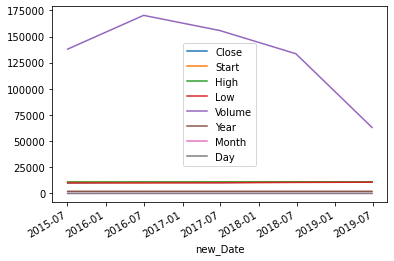

In [85]:
df.plot()